# MOwNiT 
## Laboratorium
## Wybrane zagadnienia algebry liniowej, faktoryzacja
### Algebra liniowa w Julii
https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/


In [1]:
using(LinearAlgebra)

In [2]:
methods(factorize)

# 10 methods for generic function "factorize" from LinearAlgebra:
  [1] factorize(A::Transpose)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\dense.jl:1494
  [2] factorize(D::Diagonal)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\diagonal.jl:215
  [3] factorize(A::Tridiagonal)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\lu.jl:656
  [4] factorize(a::Number)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\dense.jl:1495
  [5] factorize(A::Adjoint)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\dense.jl:1493
  [6] factorize(S::SymTridiagonal)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\ldlt.jl:172
  [7] factorize(A::LinearAlgebra.AbstractTriangular)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\triangular.jl:2750
  [8] factorize(A::Bidiagonal)
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\bidiag.jl:992
  [9] factorize(A::Union{Hermitian{T, S}, Symmetric{T, S}} where {T, S})
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\symmetric.jl:585
 [10] factorize(A::AbstractMatrix{T}) where T
     @ C:\Users\kzaja\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\dense.jl:1419

In [3]:
#wiersze vs kolumny
x1=[1 2 2]

1×3 Matrix{Int64}:
 1  2  2

In [4]:
y1=[1 ;2 ;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
transpose(x1)

3×1 transpose(::Matrix{Int64}) with eltype Int64:
 1
 2
 2

In [6]:
#iloczyn skalarny
dot(x1,y1)

11

 Długość wektora liczymy jako pierwiastek z jego iloczynu skalarnego 
$$ \lVert\mathbf{v}\rVert = \sqrt{\mathbf{v}\cdot \mathbf{v}}=\sqrt{\sum_{i=1}^nv_i^2}$$



#### Przykładowe dane

In [7]:
#losujemy macierz 3x3
A=rand(3,3)

3×3 Matrix{Float64}:
 0.600616  0.114924   0.0909144
 0.678729  0.0467853  0.890448
 0.4651    0.872854   0.79652

In [8]:
#losujemy wektor x
x=rand(3)

3-element Vector{Float64}:
 0.9242941433374684
 0.7693797037954715
 0.38289928484966196

In [9]:
# wyliczamy b
b=A*x

3-element Vector{Float64}:
 0.6783769444234711
 1.0042929680671158
 1.4064322827175113

### Sposoby rozwiązania Ax=b

In [10]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
inv(A) * b

3-element Vector{Float64}:
 0.9242941433374687
 0.7693797037954716
 0.3828992848496616

In [11]:
#najlepiej używać zoptymalizowanego operatora "\""
x=A\b

3-element Vector{Float64}:
 0.9242941433374685
 0.7693797037954715
 0.38289928484966174

 operator "\\" wybiera odpowiednią faktoryzację:
- https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/#LinearAlgebra.factorize
- https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/#man-linalg-factorizations-1
 


### Faktoryzacja LU

In [12]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
Af=factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0        0.0
 0.685251  1.0        0.0
 0.884912  0.0874448  1.0
U factor:
3×3 Matrix{Float64}:
 0.678729  0.0467853   0.890448
 0.0       0.840794    0.18634
 0.0       0.0        -0.713349

In [13]:
# Macierz L
Af.L

3×3 Matrix{Float64}:
 1.0       0.0        0.0
 0.685251  1.0        0.0
 0.884912  0.0874448  1.0

In [14]:
#Macierz U
Af.U

3×3 Matrix{Float64}:
 0.678729  0.0467853   0.890448
 0.0       0.840794    0.18634
 0.0       0.0        -0.713349

In [15]:
# wektor permulatacji wierszy 
Af.p

3-element Vector{Int64}:
 2
 3
 1

In [16]:
# mozemy zamienic macierz A na postać zfaktoryzowaną
A=factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0        0.0
 0.685251  1.0        0.0
 0.884912  0.0874448  1.0
U factor:
3×3 Matrix{Float64}:
 0.678729  0.0467853   0.890448
 0.0       0.840794    0.18634
 0.0       0.0        -0.713349

In [17]:
# i działać na niej operatorem \
# operator ten będzie wykorzytywał raz utworzony wynik faktoryzacji
A\b

3-element Vector{Float64}:
 0.9242941433374685
 0.7693797037954715
 0.38289928484966174

In [18]:
# dla różnych prawych stron równania z tą samą macierzą
c=rand(3);
A\c

3-element Vector{Float64}:
  0.6330551030548651
 -0.3540509617398862
  0.20812358461148753

### Faktoryzacja QR


In [19]:
B=rand(10,5)

10×5 Matrix{Float64}:
 0.746808   0.313534    0.0430173  0.275334    0.816386
 0.858701   0.0632319   0.170214   0.385384    0.758841
 0.933492   0.547123    0.738172   0.115346    0.360514
 0.645987   0.134709    0.714415   0.00646594  0.301245
 0.550227   0.735544    0.470995   0.449242    0.646497
 0.78214    0.639756    0.526352   0.66396     0.595244
 0.0534965  0.743798    0.191474   0.864911    0.314373
 0.418481   0.00038528  0.158739   0.682263    0.82492
 0.264744   0.585749    0.491305   0.698283    0.147575
 0.329406   0.0904659   0.613165   0.67183     0.235585

In [20]:
# W przypadku ogólnej macierzy prostokątnej wybierana jest faktoryzacja QR z pivotem
factorize(B)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor: 10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}
R factor:
5×5 Matrix{Float64}:
 -1.96338  -1.0965   -1.02686   -1.22667   -1.57505
  0.0       1.35297   0.677995   0.304625   0.454853
  0.0       0.0      -0.872069  -0.260426   0.212979
  0.0       0.0       0.0       -0.773863   0.44406
  0.0       0.0       0.0        0.0       -0.402118
permutation:
5-element Vector{Int64}:
 1
 4
 2
 3
 5

- $Q$ to macierz  ortogonalna mxm, co oznacza, że  $Q^T*Q=Q*Q^T=I$ czyli $Q^{-1}=Q^T$ (odwracanie takich macierzy jest szybkie i nie generuje dodatkowych błędów !)
- $R$ to macierz postaci $\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} $ , gdzie $Rfactor$ jest macierzą trójkątną górną, a 0 to macierz zer o wymierze nx(m-n)

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=wsp_2*x^2+wsp_1*x+wsp_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$wsp_2x_i^2+wsp_1x_i+wsp_0=y_i$$:
$$wsp_2*1^2+wsp_1*1+wsp_0=1$$
$$wsp_2*2^2+wsp_1*2+wsp_0=2$$
$$wsp_2*3^2+wsp_1*3+wsp_0=4$$
$$wsp_2*4^2+wsp_1*4+wsp_0=4$$
$$wsp_2*5^2+wsp_1*5+wsp_0=3$$
$$wsp_2*6^2+wsp_1*6+wsp_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $wsp_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*wsp\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

#### 1. Tworzymy macierz A na postawie $(x_i,y_i)$

In [21]:
A=zeros(6,3) 

6×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

 punkty $(x_i,y_i)$


In [22]:
x=[1; 2 ;3 ;4 ;5 ;6]
y=[1; 2; 4; 4; 3; 0]

6-element Vector{Int64}:
 1
 2
 4
 4
 3
 0

In [23]:
A[:,1]=x.^2

6-element Vector{Int64}:
  1
  4
  9
 16
 25
 36

In [24]:
A[:,2]=x

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [25]:
A[:,3]=ones(6)

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [26]:
A

6×3 Matrix{Float64}:
  1.0  1.0  1.0
  4.0  2.0  1.0
  9.0  3.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

#### 2. Dokonujemy faktoryzacji QR macierzy A 

In [27]:
 AF=factorize(A)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor: 6×6 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}
R factor:
3×3 Matrix{Float64}:
 -47.697  -9.24587  -1.90788
   0.0    -2.34816  -1.43091
   0.0     0.0       0.559017
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [28]:
Q=Matrix(AF.Q)

6×3 Matrix{Float64}:
 -0.0209657  -0.343313    0.838525
 -0.0838628  -0.521522    0.167705
 -0.188691   -0.534625   -0.223607
 -0.335451   -0.382624   -0.33541
 -0.524142   -0.0655178  -0.167705
 -0.754765    0.416693    0.279508

In [29]:
# można przetestować ortogonalność:
Transpose(Q)*Q

3×3 Matrix{Float64}:
 1.0           5.43927e-17   2.97814e-17
 5.43927e-17   1.0          -7.18715e-17
 2.97814e-17  -7.18715e-17   1.0

Mamy równanie:
$$A*wsp=y$$
Dla $A=QR$:
$$QR*wsp =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*wsp =Q^T y$$
$$\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} wsp= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$Rfactor * wsp= Q^T y[1:n]$$
$$wsp=Rfactor \setminus Q^T y[1:n]$$

In [30]:
# implementacja powyższego (uwaga: w tym przykladzie nie jest potrzebna permutacja,
# bo wektor permutacji wynosi[1 2 3])
AF.R\((Transpose(Q)*y)[1:3])

3-element Vector{Float64}:
 -0.5714285714285724
  3.94285714285715
 -2.8000000000000145

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

W praktyce używamy tego algorytmu poprzez operator "\\", za którym jest on "schowany".

In [31]:
A \ y

3-element Vector{Float64}:
 -0.571428571428572
  3.942857142857148
 -2.8000000000000136

In [32]:
#sprawdzamy czy dostaliśmy dobre wspólczynniki
using Polynomials
fit(x,y, 2)

Polynomial(-2.8000000000000136 + 3.942857142857148*x - 0.571428571428572*x^2)

In [33]:
@which fit

Polynomials

### Zadania

#### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 



In [ ]:
using LinearAlgebra
using BenchmarkTools
using Plots

# Ustal losowe dane
n = 1000
x_ref = rand(n)
A = rand(n, n)
b = A * x_ref

println("Drugi przebieg dla każdego sposobu - pomiar czasu i jakości")

# --- Metoda 1: inv() ---
@time x1 = inv(A) * b # pierwszy przebieg (pomijamy)
inv_time = @belapsed x1 = inv($A) * $b
error1 = norm(x1 - x_ref)

# --- Metoda 2: operator "\" ---
@time x2 = A \ b # pierwszy przebieg (pomijamy)
backslash_time = @belapsed x2 = $A \ $b
error2 = norm(x2 - x_ref)

# --- Metoda 3: factorize() ---
@time F = factorize(A) # pierwszy przebieg (pomijamy)
factorize_time = @belapsed F = factorize($A)
@time x3 = F \ b  # Add this line to compute x3
solve_time = @belapsed x3 = $F \ $b
total_factorize_time = factorize_time + solve_time
error3 = norm(x3 - x_ref)

# Wyniki
println("\nPorównanie błędów:")
println("inv():      $(error1)")
println("\\ operator: $(error2)")
println("factorize():$(error3)")

println("\nPorównanie czasów (ms):")
println("inv():      $(round(inv_time * 1000, digits=2))")
println("\\ operator: $(round(backslash_time * 1000, digits=2))")
println("factorize() + solve: $(round(total_factorize_time * 1000, digits=2))")
println("factorize() tylko: $(round(factorize_time * 1000, digits=2))")
println("solve po factorize(): $(round(solve_time * 1000, digits=2))")

# Wizualizacja wyników
methods = ["inv()", "\\ operator", "factorize()"]

# Wykres czasów wykonania
p1 = bar(methods, [inv_time, backslash_time, total_factorize_time] .* 1000,
    title="Czas wykonania (ms)",
    ylabel="Czas (ms)",
    legend=false,
    color=[:red, :blue, :green],
    lw=2)

# Wykres błędów
p2 = bar(methods, [error1, error2, error3],
    title="Błąd rozwiązania",
    ylabel="Norma błędu",
    legend=false,
    color=[:red, :blue, :green],
    lw=2,
    yaxis=:log)  # Skala logarytmiczna dla lepszej wizualizacji

# Wykres łączony
plot(p1, p2, layout=(2,1), size=(800, 600))
savefig("porownanie_metod.png")


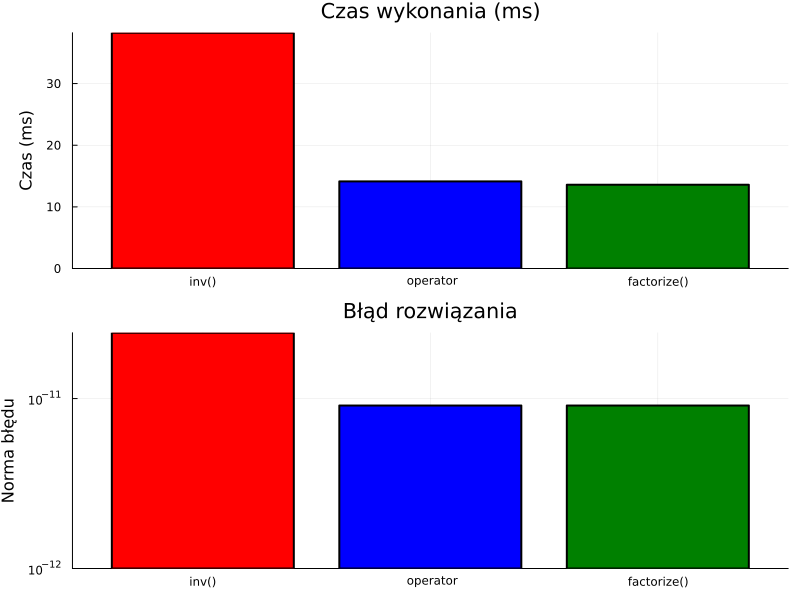porownanie_metod.png

In [ ]:
using LinearAlgebra
using Polynomials
using Plots
using BenchmarkTools

# Pełny zbiór danych
x_all = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
y_all = [1.0, 2.2, 0.5, 5.1, 10.0, 7.0, 15.0, 30.0]

# Stopnie wielomianów
degrees = 2:7

# Czasy działania
times = Dict(:qr => Float64[], :inv => Float64[], :backslash => Float64[], :polyfit => Float64[])

# Układ wykresów 2×3
plot_layout = @layout [a b c; d e f]
p_all = plot(layout=plot_layout, size=(1000, 600))

# Główna pętla
for (i, n) in enumerate(degrees)
    # Wybranie pierwszych n+1 punktów
    x = x_all[1:n+1]
    y = y_all[1:n+1]

    # Macierz Vandermonde'a
    A = [x[i]^(j-1) for i in 1:length(x), j in 1:n+1]

    # QR
    t_qr = @belapsed begin
        Q, R = qr($A)
        R \ (Q' * $y)
    end
    Q, R = qr(A)
    coeff_qr = R \ (Q' * y)

    # inv
    t_inv = @belapsed inv($A' * $A) * $A' * $y
    coeff_inv = inv(A' * A) * A' * y

    # backslash
    t_backslash = @belapsed $A \ $y
    coeff_backslash = A \ y

    # polyfit
    t_polyfit = @belapsed Polynomials.fit($x, $y, $n)
    p = Polynomials.fit(x, y, n)
    coeff_polyfit = coeffs(p)

    # Zapis czasów
    push!(times[:qr], t_qr)
    push!(times[:inv], t_inv)
    push!(times[:backslash], t_backslash)
    push!(times[:polyfit], t_polyfit)

    # Przygotowanie wykresu
    x_plot = range(minimum(x), stop=maximum(x), length=200)

    function eval_poly(coeffs, x_vals)
        [sum(c * x^(i-1) for (i, c) in enumerate(coeffs)) for x in x_vals]
    end

    y_qr = eval_poly(coeff_qr, x_plot)
    y_polyfit = evalpoly.(x_plot, Ref(coeff_polyfit))

    # Create plot in the correct subplot position
    plot!(p_all, x, y, seriestype=:scatter, label="Dane", title="Stopień $n", subplot=i)
    plot!(p_all, x_plot, y_qr, label="QR", lw=2, subplot=i)
    plot!(p_all, x_plot, y_polyfit, label="Polynomial.fit", lw=2, ls=:dash, subplot=i)
end

# Wyświetlenie wykresów aproksymacji
savefig("porownanie_metod_1.png")

# Wykres porównujący czasy działania
p_times = plot(degrees, times[:qr], label="QR", lw=2, marker=:circle)
plot!(p_times, degrees, times[:inv], label="inv()", lw=2, marker=:square)
plot!(p_times, degrees, times[:backslash], label="\\\\", lw=2, marker=:diamond)
plot!(p_times, degrees, times[:polyfit], label="Polynomial.fit", lw=2, marker=:star)
title!(p_times, "Czas działania metod")
xlabel!(p_times, "Stopień wielomianu")
ylabel!(p_times, "Czas [s]")
savefig("porownanie_metod_2.png")


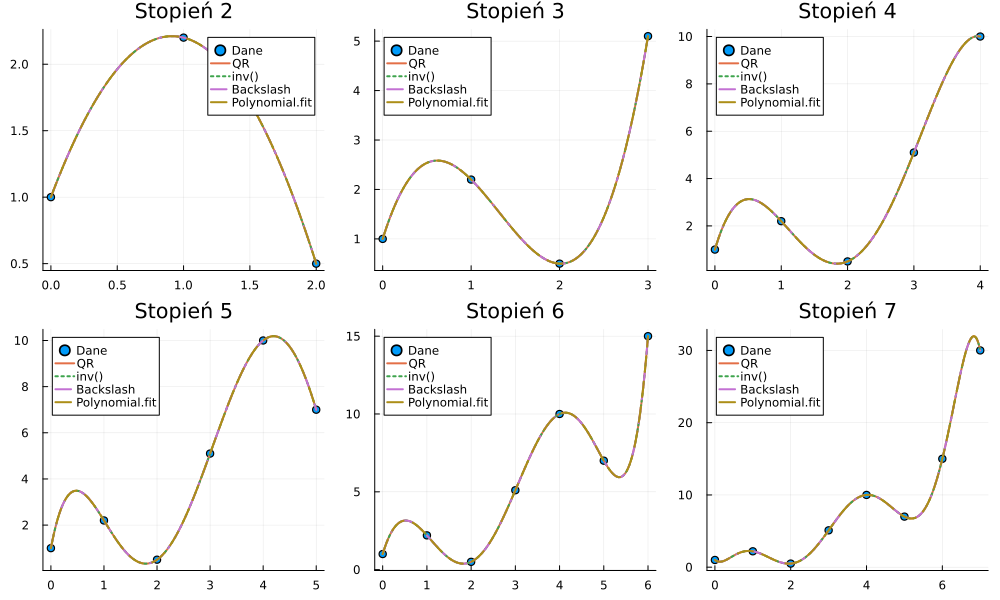
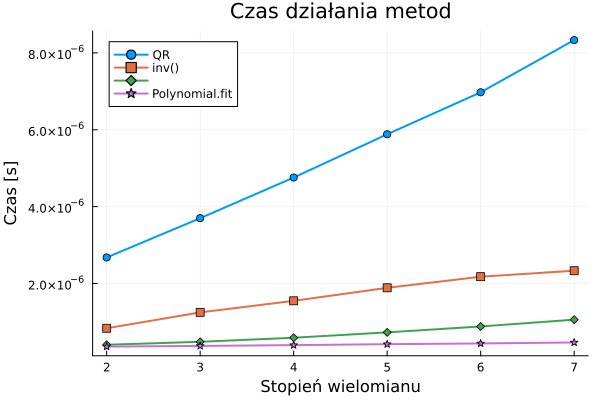
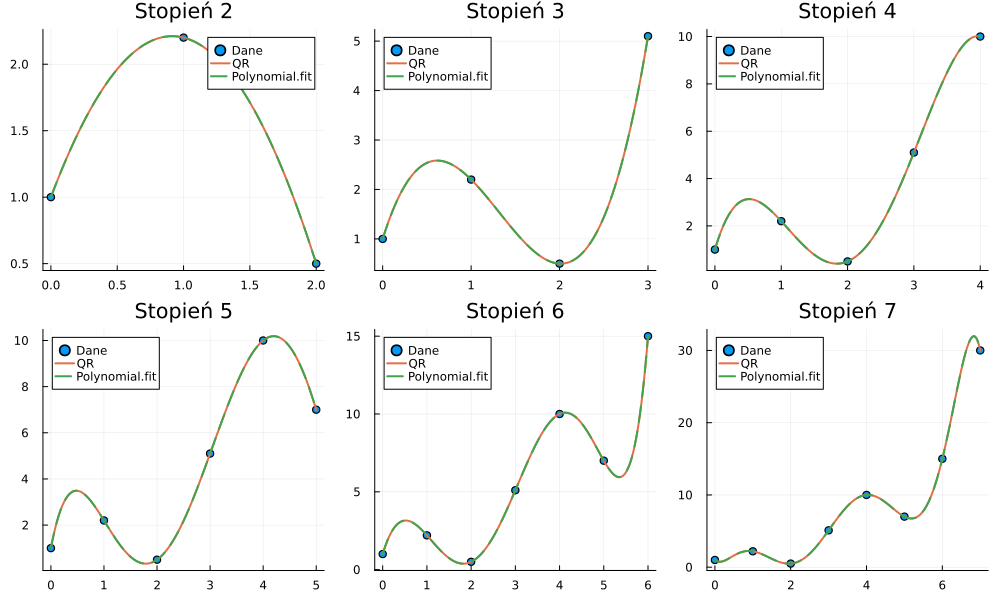

In [ ]:
use ndarray::{Array1, Array2};
use ndarray_linalg::{QR, Solve};
use rand_distr::{Normal, Distribution};
use plotters::prelude::*;

fn main() -> Result<(), Box<dyn std::error::Error>> {
    // Przykładowe dane do regresji liniowej
    let mut rng = rand::rng();
    let x_data: Vec<f64> = (1..=50).map(|i| i as f64 * 0.2).collect();
    let normal = Normal::new(0.0, 5.0).unwrap();
    let y_data: Vec<f64> = x_data
        .iter()
        .map(|&x| 2.0 + 1.8 * x + normal.sample(&mut rng))
        .collect();

    // Tworzymy macierz A (kolumna jedynek + x) i wektor b (y)
    let n = x_data.len();
    let a: Array2<f64> = Array2::from_shape_vec(
        (n, 2),
        x_data.iter().flat_map(|&x| vec![1.0, x]).collect(),
    )?;
    let b = Array1::from_vec(y_data.clone());

    // Faktoryzacja QR i rozwiązanie Rx = Qᵀb
    let (q, r) = a.qr()?;  // QR returns a tuple (Q, R) directly
    let qt_b = q.t().dot(&b);
    let x = r.solve_into(qt_b)?;

    println!("Współczynniki regresji (beta_0, beta_1): {:?}", x);

    // Wizualizacja danych i dopasowanej prostej
    let root = BitMapBackend::new("plot.png", (800, 600)).into_drawing_area();
    root.fill(&WHITE)?;

    // Znajdź min i max wartości dla skalowania wykresu
    let x_min = *x_data.iter().min_by(|a, b| a.partial_cmp(b).unwrap()).unwrap();
    let x_max = *x_data.iter().max_by(|a, b| a.partial_cmp(b).unwrap()).unwrap();
    let y_min = *y_data.iter().min_by(|a, b| a.partial_cmp(b).unwrap()).unwrap();
    let y_max = *y_data.iter().max_by(|a, b| a.partial_cmp(b).unwrap()).unwrap();

    // Dodaj margines dla lepszej czytelności
    let x_margin = (x_max - x_min) * 0.1;
    let y_margin = (y_max - y_min) * 0.1;

    let mut chart = ChartBuilder::on(&root)
        .caption("Dopasowanie liniowe (regresja QR)", ("sans-serif", 30))
        .margin(30)
        .x_label_area_size(40)
        .y_label_area_size(40)
        .build_cartesian_2d(
            (x_min - x_margin)..(x_max + x_margin),
            (y_min - y_margin)..(y_max + y_margin)
        )?;

    chart.configure_mesh().draw()?;

    // Punkty danych
    chart.draw_series(
        x_data
            .iter()
            .zip(y_data.iter().cloned()) // Use cloned() to avoid moving y_data
            .map(|(&x, y)| Circle::new((x, y), 5, RED.filled())),
    )?;

    // Linia regresji: y = beta_0 + beta_1 * x
    let beta_0 = x[0];
    let beta_1 = x[1];

    // Rysuj linię regresji dokładnie w zakresie danych
    chart.draw_series(LineSeries::new(
        vec![
            (x_min - x_margin, beta_0 + beta_1 * (x_min - x_margin)),
            (x_max + x_margin, beta_0 + beta_1 * (x_max + x_margin))
        ],
        &BLUE,
    ))?;

    println!("Wykres zapisany do plot.png");

    Ok(())
}


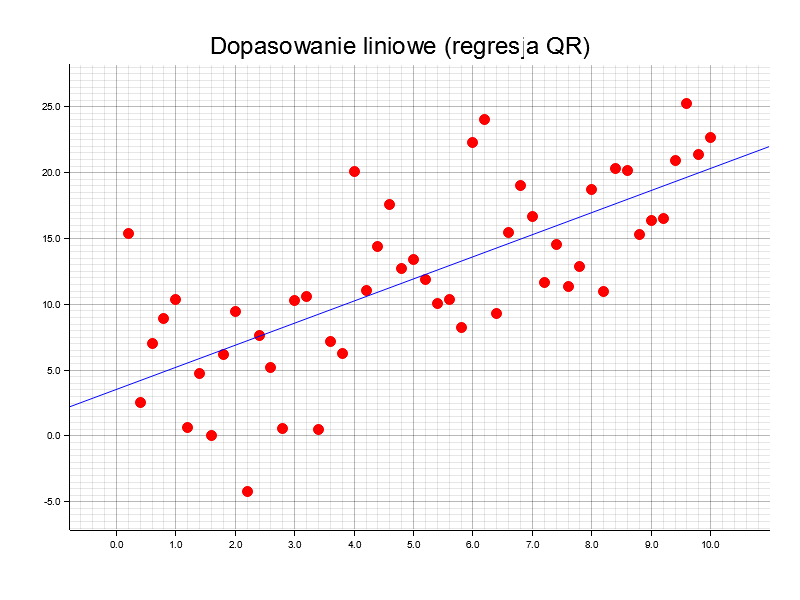